# Análisis de componentes principales

Una de las aplicaciones de PCA es la reducción de dimensionalidad (variables), perdiendo la menor cantidad de información (varianza) posible: cuando contamos con un gran número de variables cuantitativas posiblemente correlacionadas (indicativo de existencia de información redundante), PCA permite reducirlas a un número menor de variables transformadas (componentes principales) que expliquen gran parte de la variabilidad en los datos. Cada dimensión o componente principal generada por PCA será una combinación lineal de las variables originales, y serán además independientes o no correlacionadas entre sí.

In [1]:
# Importamos las librerías necesarias
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para operaciones numéricas
from sklearn.decomposition import PCA  # Para el análisis de componentes principales
from sklearn.datasets import load_wine  # Conjunto de datos 'wine'
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
import matplotlib.pyplot as plt  # Para visualización
import seaborn as sns  # Para gráficos más estilizados
import tensorflow as tf
from tensorflow import keras
!sudo pip3 install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


El conjunto de datos `df` contiene información sobre diferentes vinos. Incluye características químicas de cada vino (como los
niveles de alcohol, ácido málico, cenizas, alcalinidad de las cenizas, magnesio, etc.)
Adicionalmente, la columna 'target' codifica la clase o tipo de vino al que pertenece cada muestra.  
Clase 0: Vinos de la primera región (denominados como "0")

Clase 1: Vinos de la segunda región (denominados como "1")

Clase 2: Vinos de la tercera región (denominados como "2")

In [2]:
# Cargamos el conjunto de datos 'wine'
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Verificar los  valores únicos de target
df['target'].unique()

array([0, 1, 2])

Para encontrar el máximo, minimo, media, desviación estandar, entre otros descriptivos estadsticos podemos utilizar la función .describe () aplicada a todo el data frame. Encuentre, imprima y redacte un parrafo con la descripción estadistica de df.



In [4]:
# Descripción del dataset
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [5]:
# Exploramos el conjunto de datos
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [6]:
# red neuronal para el dataset df

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(df.shape[1]-1,))) # Capa de entrada con 64 neuronas
model.add(Dense(32, activation='relu')) # Capa oculta con 32 neuronas
model.add(Dense(3, activation='softmax')) # Capa de salida con 3 neuronas (para las 3 clases)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X = df.drop('target', axis=1)
y = to_categorical(df['target'])

# Entrenar el modelo
model.fit(X, y, epochs=100, batch_size=32, verbose=1) # Ajustar los parámetros según sea necesario

c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4198 - loss: 43.5582
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3192 - loss: 25.7820
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 12.8377 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 4.3876
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2968 - loss: 6.0377
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4072 - loss: 3.5526
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 3.2971
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 2.6405
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4181 - loss: 2.2997
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5535 - loss: 1.9900
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6249 - loss: 1.6722
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 1.39

#La Matriz de confusión
Es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


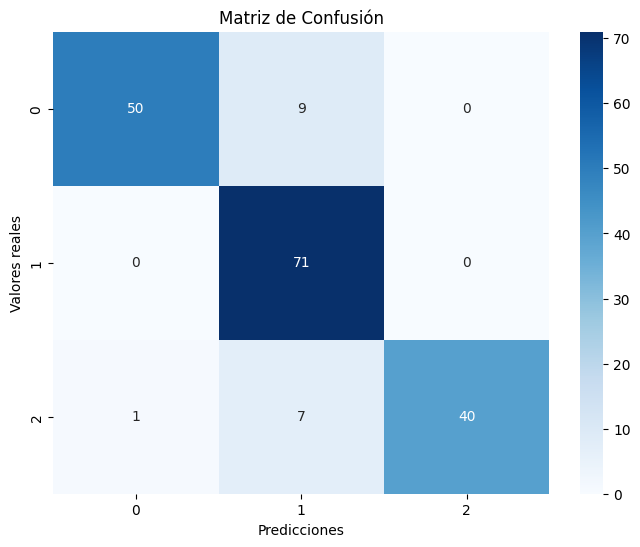

In [7]:
# matriz de confusión

from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(df['target']), yticklabels=np.unique(df['target']))
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [8]:
# Exactitud, sensibilidad, especificidad y la precisión

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtener las predicciones del modelo
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # Usar average='weighted' para multiclase
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Calcular la especificidad
tn = conf_matrix[0,0]
fp = conf_matrix[0,1] + conf_matrix[0,2]
fn = conf_matrix[1,0] + conf_matrix[2,0]
tp = conf_matrix[1,1] + conf_matrix[2,2]
specificity = tn / (tn + fp)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Sensibilidad (Recall): {recall}")
print(f"Especificidad: {specificity}")
print(f"F1-score: {f1}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Exactitud: 0.9044943820224719
Precisión: 0.920144190958057
Sensibilidad (Recall): 0.9044943820224719
Especificidad: 0.847457627118644
F1-score: 0.9049598531180097


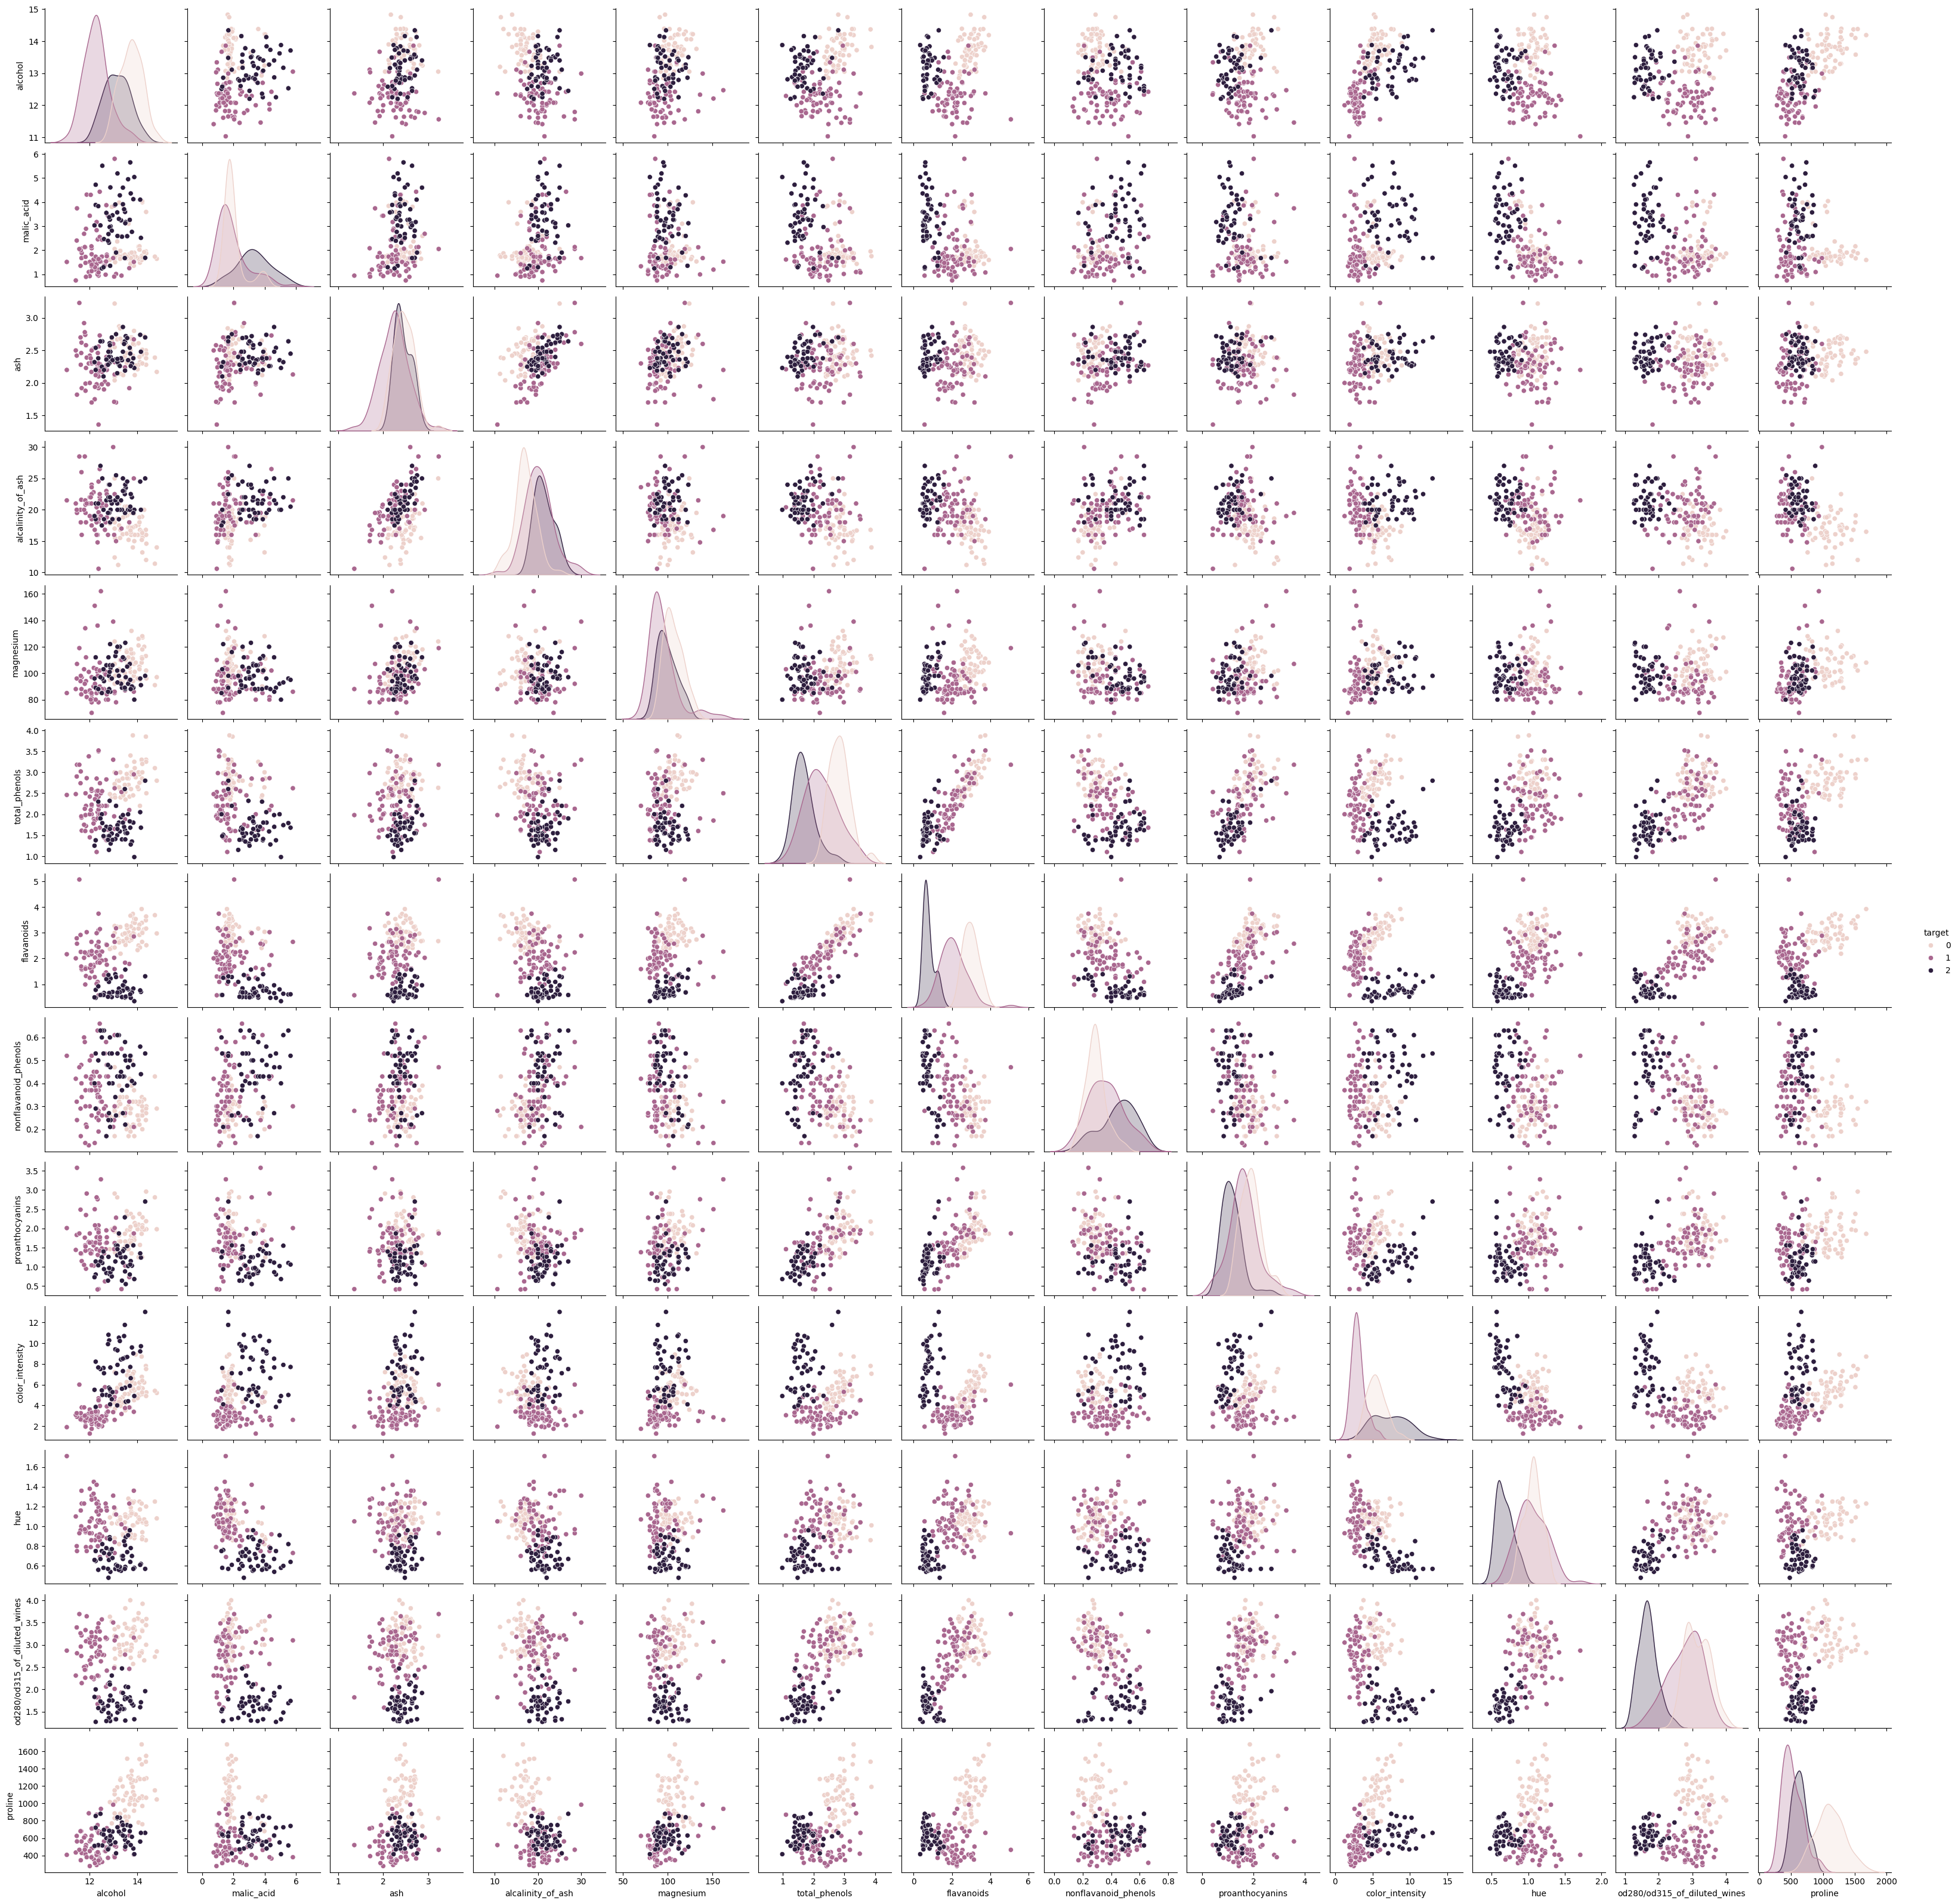

In [9]:
# Gráficos de dispersión de las variables cuantitativas
sns.pairplot(df, hue='target', vars=df.columns[:-1])
plt.show()

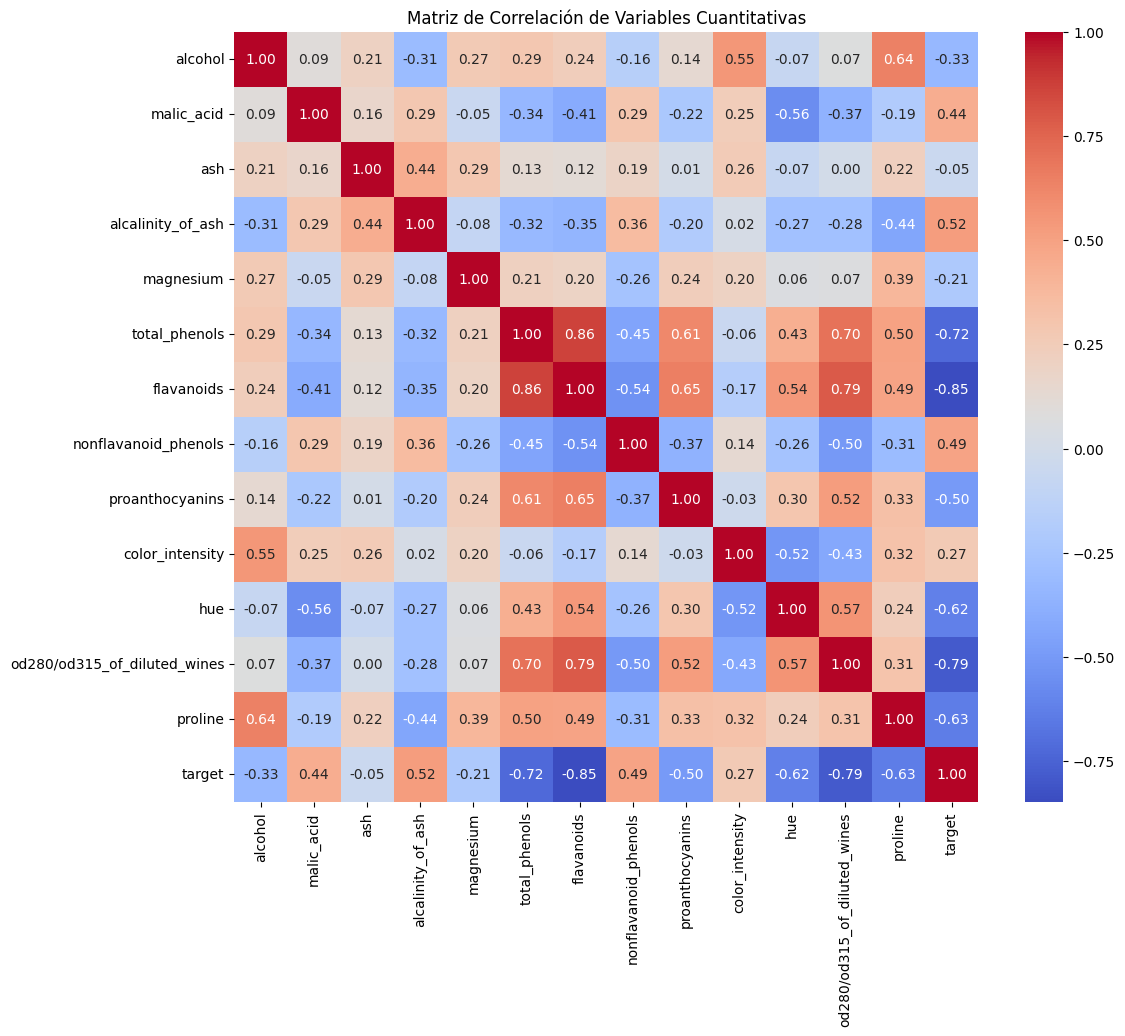

In [10]:
# matriz de correlación de las variables cuantitativas de df
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor de la matriz de correlación con colores
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

## Normalización de datos
La normalización de datos es un paso clave en el análisis de componentes principales (PCA) porque ayuda a que todas las características (o variables) del conjunto de datos tengan la misma importancia en el análisis.

La normalización, en este caso con StandardScaler, toma cada variable y:

Le resta su media (promedio), para centrarla en 0.
La división por su desviación estándar, para que la mayoría de sus valores queden en el rango de -1 a 1 aproximadamente.

In [11]:
# Normalizamos los datos para evitar que características con mayores magnitudes dominen el PCA
X = df.drop('target', axis=1)  # Seleccionamos solo las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Crear un nuevo DataFrame con los datos normalizados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Agregar la columna 'target' al nuevo DataFrame
df_scaled['target'] = df['target']

# Mostrar las primeras filas del nuevo DataFrame
print(df_scaled.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.251717  0.362177                      1.847920  1.013009       0  
1        -0.

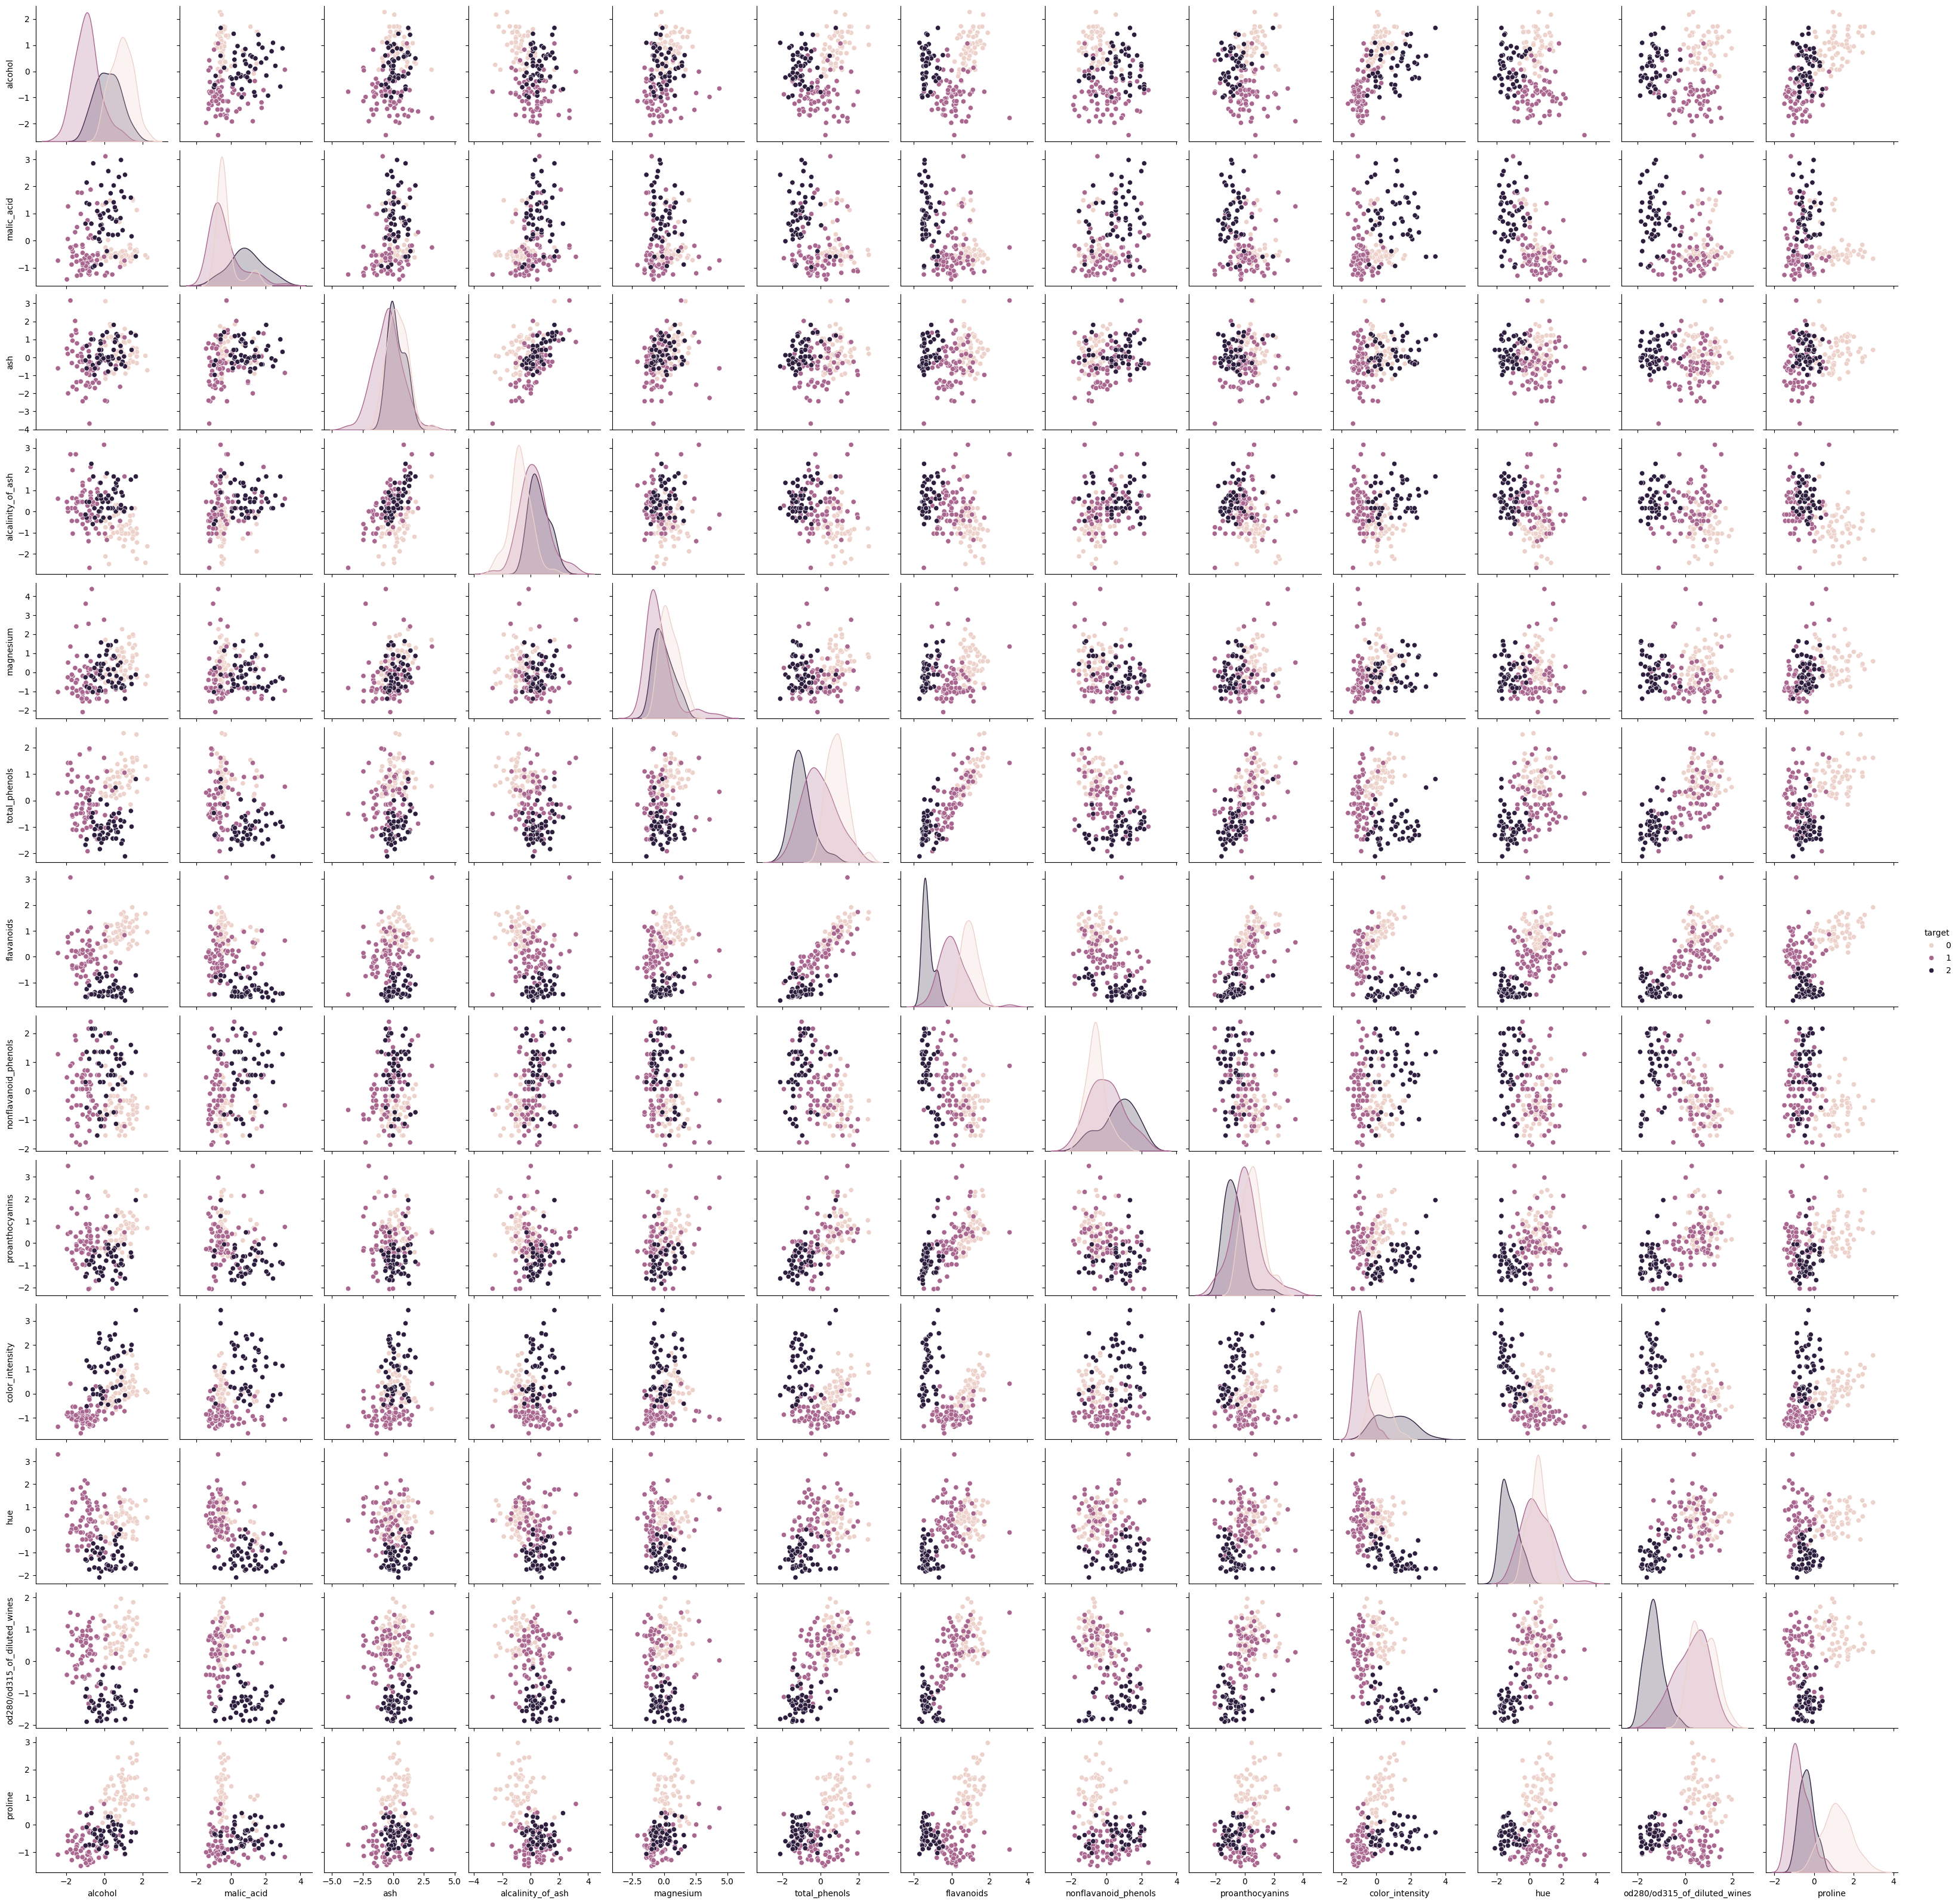

In [24]:
# realiza el gráfico de dispersión del nuevo dataset normalizado
sns.pairplot(df_scaled, hue='target', vars=df_scaled.columns[:-1])
plt.show()

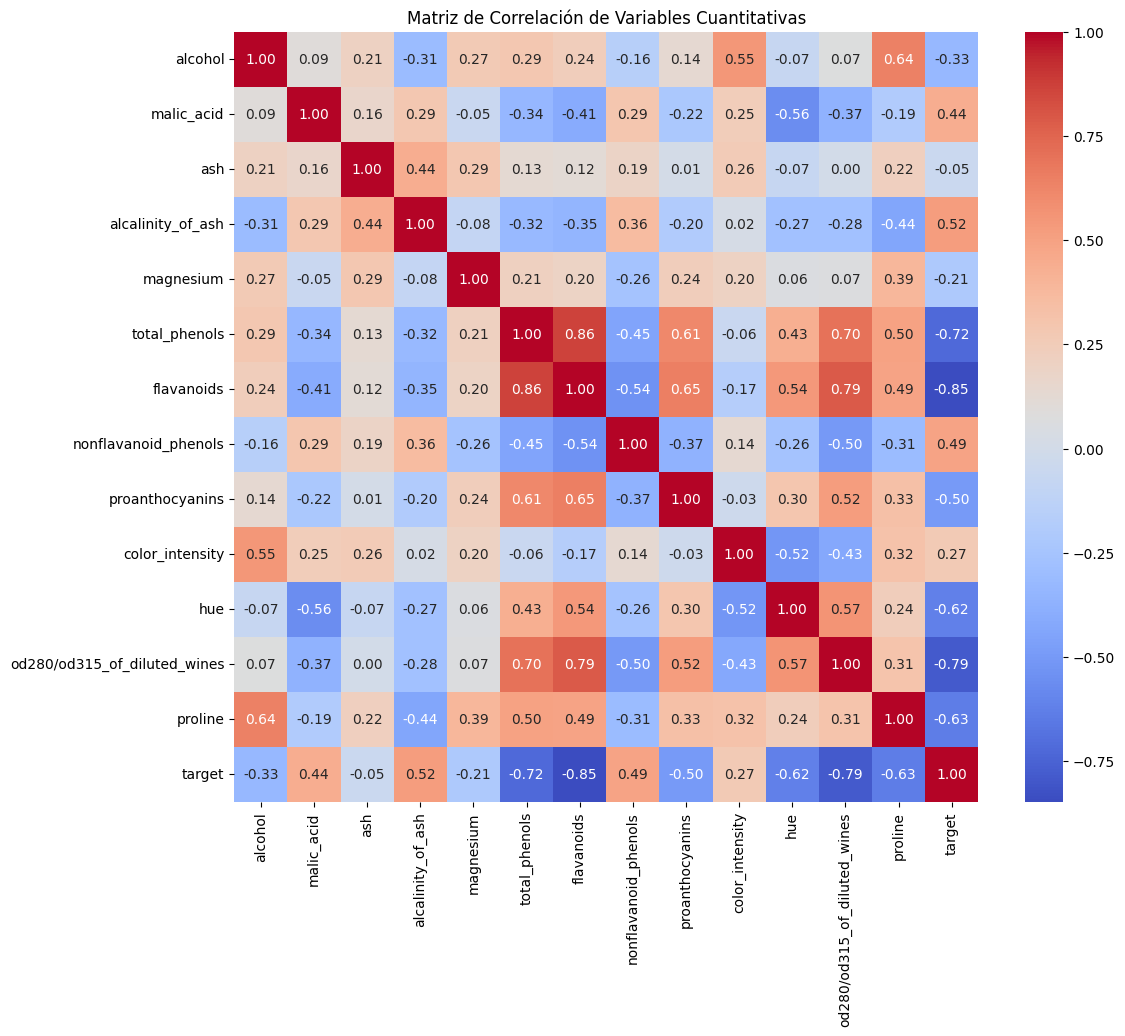

In [25]:
# realiza la matriz de correlación del nuevo dataset normalizado
correlation_matrix = df_scaled.corr()

# Crear el mapa de calor de la matriz de correlación con colores
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

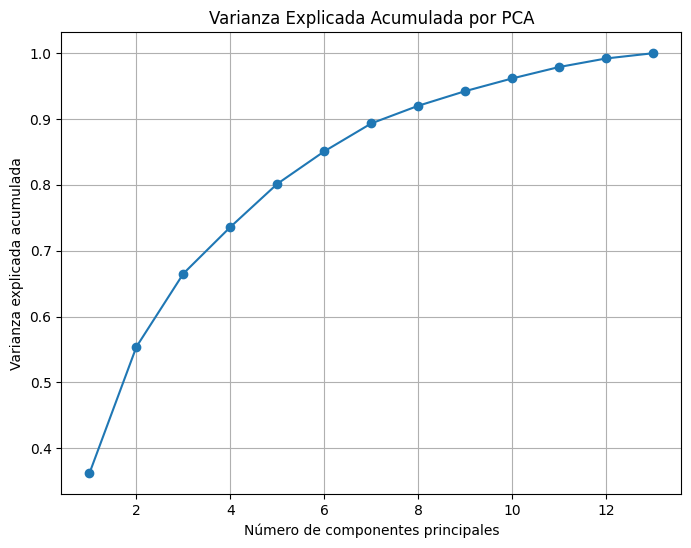

El número de componentes ideal para PCA es: 10


In [37]:
# Escogemos la cantidad de componentes ideal para PCA

# Aplicamos PCA
pca = PCA()
pca.fit(X_scaled)

# Calculamos la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calculamos la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.grid(True)
plt.show()

# Elegimos el número de componentes que expliquen al menos un 95% de la varianza
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"El número de componentes ideal para PCA es: {n_components}")

In [27]:
# cambia la varianza explicada a la que tu desees y encuentra el número de componentes ideal
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"El número de componentes ideal para PCA es: {n_components}")

El número de componentes ideal para PCA es: 5



Varianza explicada por componente:
      Proporción de Varianza  % Acumulado
PC1                 0.361988    36.198848
PC2                 0.192075    55.406338
PC3                 0.111236    66.529969
PC4                 0.070690    73.598999
PC5                 0.065633    80.162293
PC6                 0.049358    85.098116
PC7                 0.042387    89.336795
PC8                 0.026807    92.017544
PC9                 0.022222    94.239698
PC10                0.019300    96.169717
PC11                0.017368    97.906553
PC12                0.012982    99.204785
PC13                0.007952   100.000000

Contribuciones de variables (%):
                                    PC1        PC2        PC3        PC4  \
alcohol                        2.083097  23.391882   4.300755   0.031885   
malic_acid                     6.011695   5.059393   0.792329  28.825118   
ash                            0.000421   9.989950  39.215637   4.587117   
alcalinity_of_ash              5.72742

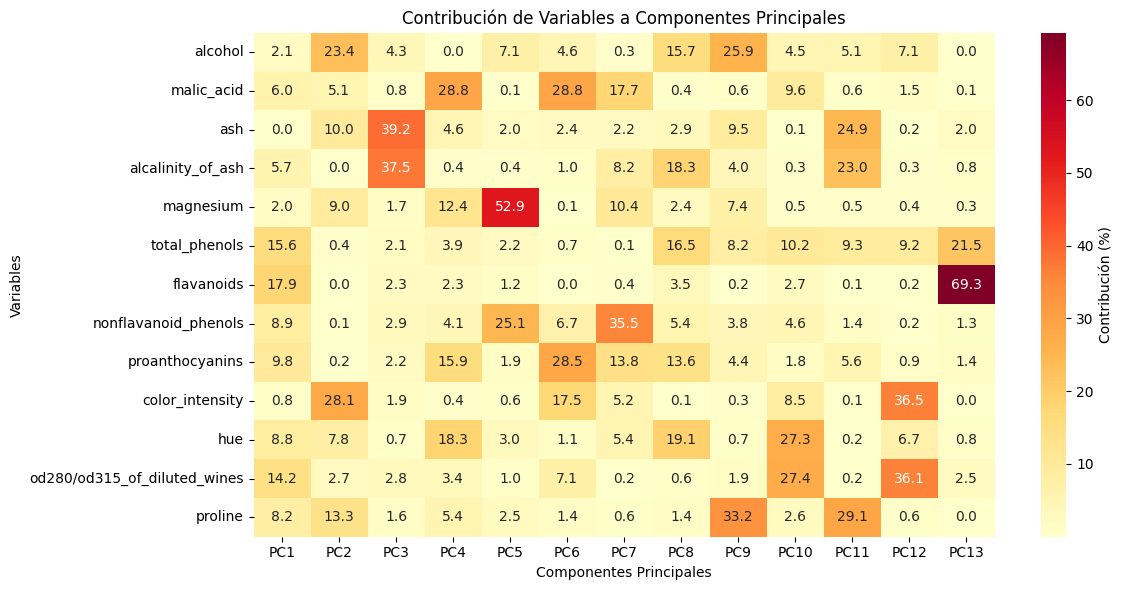

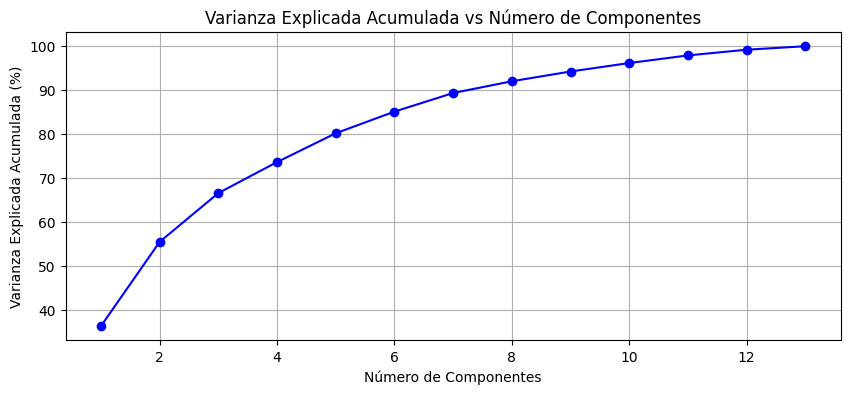

In [ ]:
# Ver el porcentaje de participación de cada variable en las componentes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_pca_contributions(pca, feature_names):
    """
    Analiza las contribuciones de las variables en un PCA ya ajustado
    
    Parámetros:
    pca: PCA objeto ya ajustado con fit()
    feature_names: lista con los nombres de las variables originales
    
    Retorna:
    Dict con diferentes métricas del PCA
    """
    # 1. Obtener los loadings (coeficientes)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=feature_names
    )
    
    # 2. Varianza explicada por cada componente
    var_ratio = pd.DataFrame(
        pca.explained_variance_ratio_,
        index=[f'PC{i+1}' for i in range(pca.n_components_)],
        columns=['Proporción de Varianza']
    )
    var_ratio['% Acumulado'] = var_ratio['Proporción de Varianza'].cumsum() * 100
    
    # 3. Calcular contribuciones de variables
    # Squared loadings
    loadings_squared = loadings ** 2
    
    # Contribución relativa de cada variable a cada PC (en porcentaje)
    contributions = loadings_squared.copy()
    for i in range(pca.n_components_):
        contributions.iloc[:,i] = contributions.iloc[:,i] * 100
        
    # 4. Calidad de representación (cos2)
    cos2 = loadings_squared.multiply(pca.explained_variance_ratio_, axis=1)
    total_cos2 = cos2.sum(axis=1)
    
    # Visualizaciones
    def plot_contributions():
        plt.figure(figsize=(12, 6))
        sns.heatmap(contributions, 
                   annot=True, 
                   fmt='.1f',
                   cmap='YlOrRd',
                   cbar_kws={'label': 'Contribución (%)'})
        plt.title('Contribución de Variables a Componentes Principales')
        plt.ylabel('Variables')
        plt.xlabel('Componentes Principales')
        plt.tight_layout()
        plt.show()
        
        # Gráfico de varianza explicada
        plt.figure(figsize=(10, 4))
        plt.plot(range(1, len(var_ratio) + 1), 
                var_ratio['% Acumulado'], 
                'bo-')
        plt.xlabel('Número de Componentes')
        plt.ylabel('Varianza Explicada Acumulada (%)')
        plt.title('Varianza Explicada Acumulada vs Número de Componentes')
        plt.grid(True)
        plt.show()
    
    return {
        'loadings': loadings,
        'varianza_explicada': var_ratio,
        'contribuciones': contributions,
        'calidad_representacion': cos2,
        'calidad_total': total_cos2,
        'plot_contributions': plot_contributions
    }

# Análisis de contribuciones
resultados = analyze_pca_contributions(pca, feature_names=X.columns)

# Ver resultados
print("\nVarianza explicada por componente:")
print(resultados['varianza_explicada'])

print("\nContribuciones de variables (%):")
print(resultados['contribuciones'])

print("\nCalidad de representación total por variable:")
print(resultados['calidad_total'])

# Generar visualizaciones
resultados['plot_contributions']()


In [28]:
# Convertir  en dataframe las componentes principales

# Aplicamos PCA con el número de componentes seleccionado
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Convertir las componentes principales a un DataFrame de pandas
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Agregar la columna 'target' al DataFrame de componentes principales
df_pca['target'] = df['target']

# Mostrar las primeras filas del DataFrame de componentes principales
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5  target
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043       0
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655       0
2  2.516740 -1.031151  0.982819  0.724902 -0.251033       0
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842       0
4  1.008908 -0.869831  2.026688 -0.409766  0.298458       0


In [19]:
# red neuronal con df_pca

# Definir el modelo de red neuronal con df_pca
model_pca = Sequential()
model_pca.add(Dense(64, activation='relu', input_shape=(df_pca.shape[1]-1,))) # Capa de entrada
model.add(Dense(32, activation='tanh')) # Capa oculta con 32 neuronas
model_pca.add(Dense(3, activation='softmax')) # Capa de salida

# Compilar el modelo
model_pca.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X_pca = df_pca.drop('target', axis=1)
y_pca = to_categorical(df_pca['target'])

# Entrenar el modelo
model_pca.fit(X_pca, y_pca, epochs=100, batch_size=32, verbose=1) # Ajustar parámetros si es necesario

Epoch 1/100


c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2972 - loss: 1.1934
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4251 - loss: 1.0917
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5310 - loss: 0.9994
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.8834
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.8048
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.7415  
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.6707
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.6306
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.5941
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.5215
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.5188
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.4941
Epoch 13/10

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


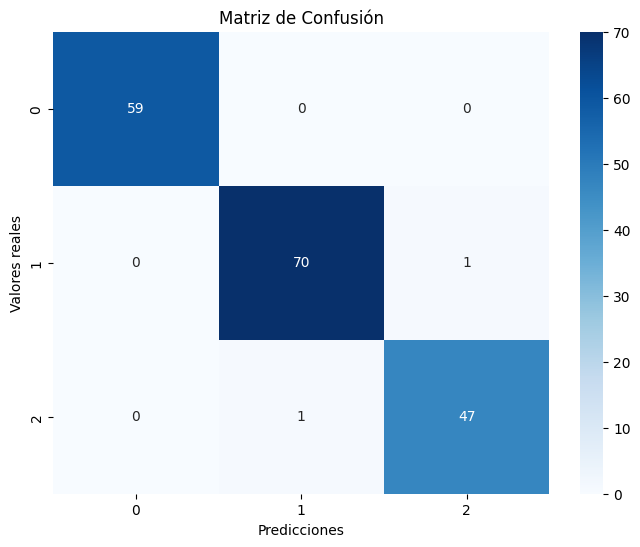

In [32]:
# Crea la matriz de confusión y compara
# Obtener las predicciones del modelo
y_pred = model_pca.predict(X_pca)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(df['target']), yticklabels=np.unique(df['target']))
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Agrega más capas ocultas o neuronas
# Definir el modelo de red neuronal con df_pca
model_pca = Sequential()
model_pca.add(Dense(64, activation='relu', input_shape=(df_pca.shape[1]-1,))) # Capa de entrada
model.add(Dense(48, activation='tanh')) # Primera capa oculta
model.add(Dense(32, activation='tanh')) # Segunda capa oculta
model.add(Dense(24, activation='tanh')) # Tercera capa oculta
model.add(Dense(16, activation='tanh')) # Cuarta capa oculta
model_pca.add(Dense(3, activation='softmax')) # Capa de salida

# Compilar el modelo
model_pca.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X_pca = df_pca.drop('target', axis=1)
y_pca = to_categorical(df_pca['target'])

# Entrenar el modelo
model_pca.fit(X_pca, y_pca, epochs=100, batch_size=32, verbose=1) # Ajustar parámetros si es necesario

Epoch 1/100


c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 1.3400
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 1.1759
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3992 - loss: 1.0359
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4697 - loss: 0.9582
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 0.8840
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.7955
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8914 - loss: 0.6965
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.6645
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.6010
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8959 - loss: 0.5659
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.5367
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.5123
Epoch 13/100


In [40]:
# Cambia las funciones de activación
# Definir el modelo de red neuronal con df_pca
model_pca = Sequential()
model_pca.add(Dense(64, activation='relu', input_shape=(df_pca.shape[1]-1,))) # Capa de entrada con ReLU
model.add(Dense(48, activation='sigmoid')) # Primera capa oculta con Sigmoid
model.add(Dense(32, activation='elu')) # Segunda capa oculta con ELU
model.add(Dense(24, activation='selu')) # Tercera capa oculta con SELU
model.add(Dense(16, activation='leaky_relu')) # Cuarta capa oculta con Leaky ReLU
model_pca.add(Dense(3, activation='softmax')) # Capa de salida con Softmax

# Compilar el modelo
model_pca.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X_pca = df_pca.drop('target', axis=1)
y_pca = to_categorical(df_pca['target'])

# Entrenar el modelo
model_pca.fit(X_pca, y_pca, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3760 - loss: 1.1201
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5671 - loss: 0.9995
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6789 - loss: 0.9085
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.8336
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.7703
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.7201
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9142 - loss: 0.6651
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: 0.6206
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9047 - loss: 0.5805
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9335 - loss: 0.5467
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.5047
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.4764
Epoch 13/100


In [41]:
# Cambia el optimizador
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax, Nadam, Adadelta

# Definir el modelo de red neuronal con df_pca
model_pca = Sequential()
model_pca.add(Dense(64, activation='relu', input_shape=(df_pca.shape[1]-1,))) # Capa de entrada con ReLU
model.add(Dense(48, activation='sigmoid')) # Primera capa oculta con Sigmoid
model.add(Dense(32, activation='elu')) # Segunda capa oculta con ELU
model.add(Dense(24, activation='selu')) # Tercera capa oculta con SELU
model.add(Dense(16, activation='leaky_relu')) # Cuarta capa oculta con Leaky ReLU
model_pca.add(Dense(3, activation='softmax')) # Capa de salida con Softmax

# Definir diferentes optimizadores con sus configuraciones
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rmsprop = RMSprop(learning_rate=0.001, rho=0.9)
adamax = Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
nadam = Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
adadelta = Adadelta(learning_rate=1.0, rho=0.95)

# Usando Adam:
model_pca.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Preparar los datos
X_pca = df_pca.drop('target', axis=1)
y_pca = to_categorical(df_pca['target'])

# Entrenar el modelo
model_pca.fit(X_pca, y_pca, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3661 - loss: 1.2108  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3520 - loss: 1.1368  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4986 - loss: 0.9889
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5749 - loss: 0.8948
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7549 - loss: 0.8073
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.6933
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.6655 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.5730
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 0.5091
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9566 - loss: 0.4778
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9354 - loss: 0.4521
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.3860  
Epoch 